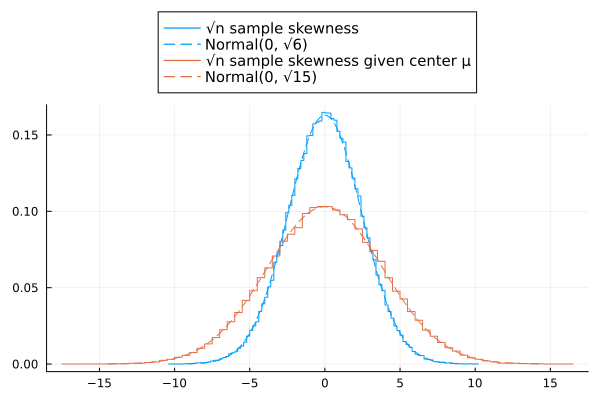

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

function sim_skewness(dist, n; L=10^5)
    μ = mean(dist)
    Skew = zeros(L)
    Skew_μ = zeros(L)
    Xtmp = zeros(eltype(dist), n)
    for i in 1:L
        X = rand!(dist, Xtmp)
        Skew[i] = skewness(X)
        Skew_μ[i] = skewness(X, μ)
    end
    Skew, Skew_μ
end

dist = Normal(2, 3)
n = 1000
Skew, Skew_μ = sim_skewness(dist, n)

stephist(√n * Skew; norm=true, c=1, label="√n sample skewness")
plot!(Normal(0, √6); c=1, ls=:dash, label="Normal(0, √6)")
stephist!(√n * Skew_μ; norm=true, c=2, label="√n sample skewness given center μ")
plot!(Normal(0, √15); c=2, ls=:dash, label="Normal(0, √15)")
plot!(legend=:outertop, legendfontsize=10)